Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

C:\Users\HP Elitbook\AppData\Local\Temp\ipykernel_15240\1101971182.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\HP Elitbook\AppData\Local\Temp\ipykernel_15240\1101971182.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

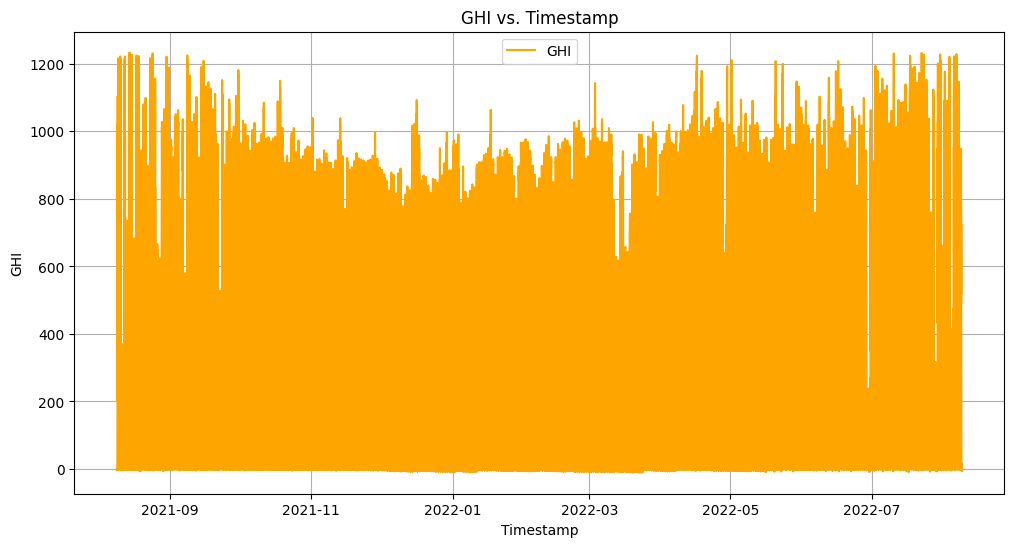

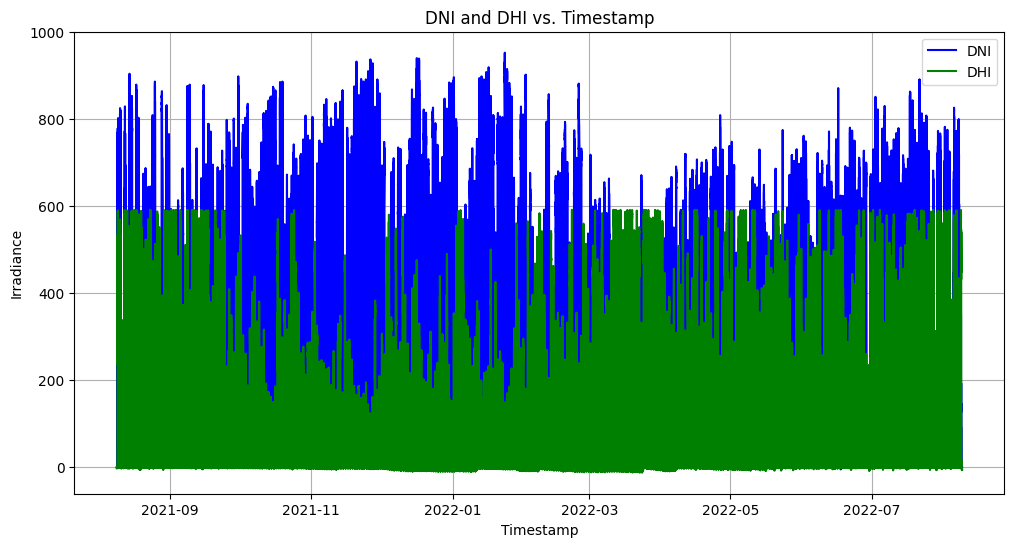

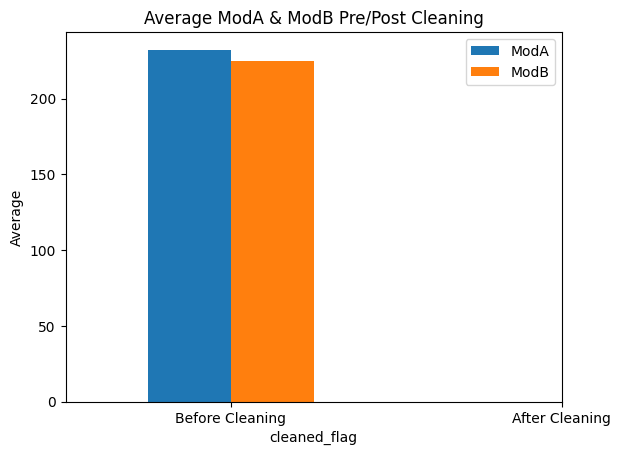

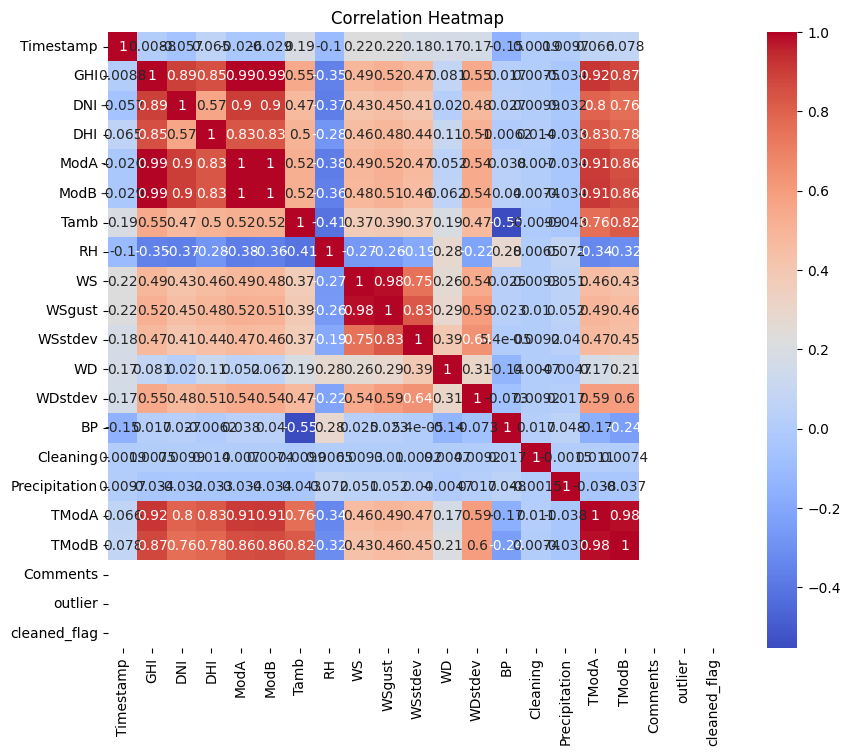

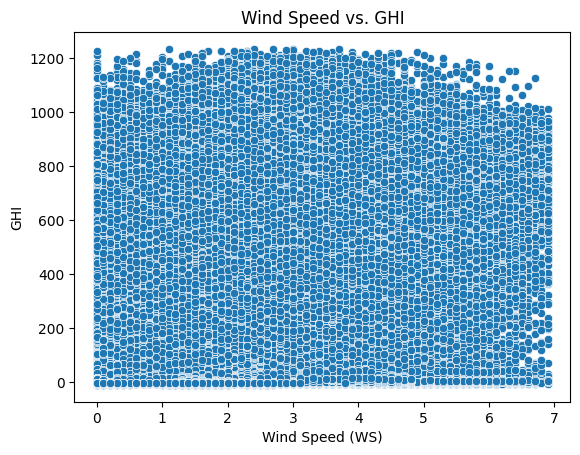

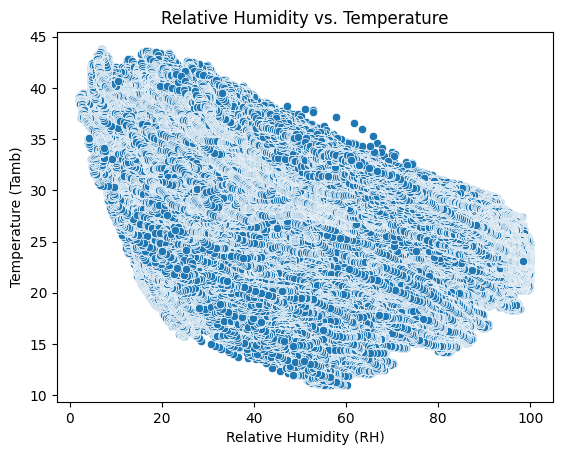

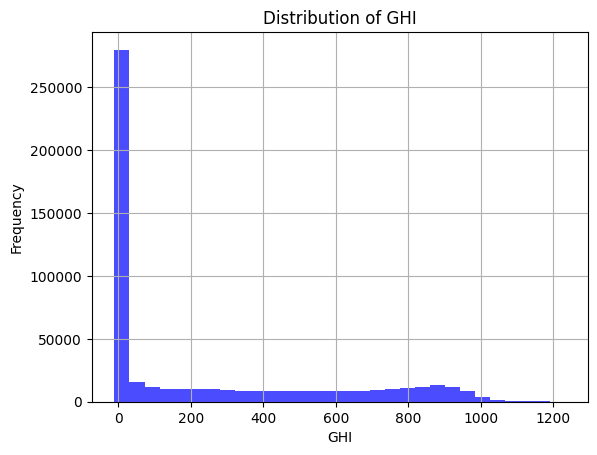

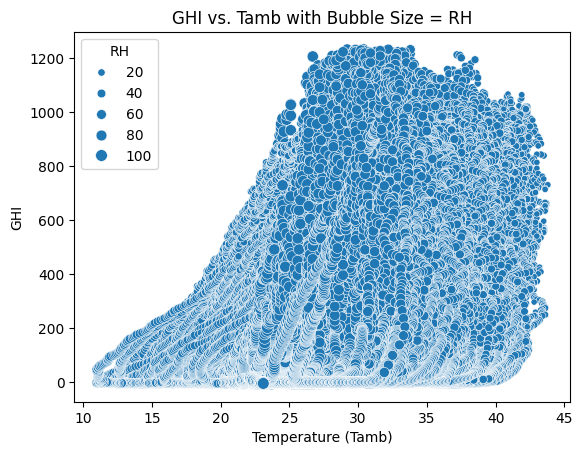

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway  # For ANOVA

# Load cleaned datasets for Benin, Sierra Leone, and Togo
benin_df = pd.read_csv('../data/benin_clean.csv')  # Adjust the path as needed
sierraleone_df = pd.read_csv('../data/sierraleone_clean.csv')  # Adjust the path as needed
togo_df = pd.read_csv('../data/togo_clean.csv')  # Adjust the path as needed

# Add a country column to each DataFrame
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine the datasets
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

# Step 1: Metric Comparison - Boxplots
plt.figure(figsize=(18, 6))

# GHI Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Country', y='GHI', data=combined_df)
plt.title('GHI by Country')

# DNI Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='Country', y='DNI', data=combined_df)
plt.title('DNI by Country')

# DHI Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='Country', y='DHI', data=combined_df)
plt.title('DHI by Country')

plt.tight_layout()
plt.show()

# Step 2: Summary Table
summary_table = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).reset_index()
print("\nSummary Table:")
print(summary_table)

# Step 3: Statistical Testing (One-way ANOVA)
f_stat, p_value = f_oneway(benin_df['GHI'], sierraleone_df['GHI'], togo_df['GHI'])
print(f'\nOne-way ANOVA results: F-statistic = {f_stat}, p-value = {p_value}')

# (Bonus) Visual Summary - Bar chart ranking countries by average GHI
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values()
avg_ghi.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=45)
plt.show()